# EXERCISE 2B

Imagine you are a data scientist working for an international development organization. Your team wants to understand how countries differ in terms of economy, health, and social well-being. You have access to a dataset containing multiple indicators for countries worldwide, such as GDP per capita, life expectancy, child mortality, and population.

Your task is to discover natural groupings of countries using hierarchical clustering. By examining these clusters, you can identify patterns such as:

- Which countries are economically developed or developing

- How social and health indicators vary across regions

- Surprising similarities between countries from different continents

Answer each question by completing the corresponding code cell. **Do not remove or reorder cells.**


In [285]:
import kagglehub
import os
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("rohan0301/unsupervised-learning-on-country-data")

print("Path to dataset files:", path)

if os.path.isdir(path):
  print(True)

contents = os.listdir(path)
contents

mydataset = path + "/" + contents[0]
mydataset


df = pd.read_csv(mydataset)

Using Colab cache for faster access to the 'unsupervised-learning-on-country-data' dataset.
Path to dataset files: /kaggle/input/unsupervised-learning-on-country-data
True


## 1. Import Required Libraries
Import the core libraries needed for data analysis, visualization, and clustering.

In [286]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering


## 2. Load the Dataset
Upload the CSV file for *the* **Country Data** dataset.

In [287]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rohan0301/unsupervised-learning-on-country-data")

print("Path to dataset files:", path)

if os.path.isdir(path):
  print(True)

contents = os.listdir(path)
contents

mydataset = path + "/" + contents[0]
mydataset


df = pd.read_csv(mydataset)


Using Colab cache for faster access to the 'unsupervised-learning-on-country-data' dataset.
Path to dataset files: /kaggle/input/unsupervised-learning-on-country-data
True


## 3. Exploring the Dataset

Display the first 10 rows of the dataset `(5 pts)`

- Show the initial records to understand the dataset's structure and variables.

In [288]:
# put your answer here

df.head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.440,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.400,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840


Display the shape of the dataset `(5 pts)`
- How many rows (countries) and how many features does the dataset contain?

In [289]:
# put your answer here
df.shape

(167, 10)

Show summary statistics using `describe()`. `(5 pts)`

In [290]:
# put your answer here
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


Check for missing values. `(5 pts)`

In [291]:
# put your answer here
df.isnull().sum()

,0
country,0
child_mort,0
exports,0
health,0
imports,0
income,0
inflation,0
life_expec,0
total_fer,0
gdpp,0


## 4. Data Preprocessing

Select only the numerical columns for clustering `(5 pts)`
- Exclude any non-numeric fields, such as 'Country Name' or categorical variables.

In [292]:
# put your answer here
df_numerical = df.select_dtypes(include=[np.number])
df_numerical

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


Standardize the selected numerical features `(5 pts)`

- This ensures all features contribute equally to the distance calculations used in clustering.

In [293]:
# put your answer here
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numerical)
df_scaled

array([[ 1.29153238, -1.13827979,  0.27908825, ..., -1.61909203,
         1.90288227, -0.67917961],
       [-0.5389489 , -0.47965843, -0.09701618, ...,  0.64786643,
        -0.85997281, -0.48562324],
       [-0.27283273, -0.09912164, -0.96607302, ...,  0.67042323,
        -0.0384044 , -0.46537561],
       ...,
       [-0.37231541,  1.13030491,  0.0088773 , ...,  0.28695762,
        -0.66120626, -0.63775406],
       [ 0.44841668, -0.40647827, -0.59727159, ..., -0.34463279,
         1.14094382, -0.63775406],
       [ 1.11495062, -0.15034774, -0.33801514, ..., -2.09278484,
         1.6246091 , -0.62954556]])

## 5. Exploratory Data Analysis

Generate a correlation heatmap
- Visualize the relationships between socioeconomic indicators. `(10 pts)`

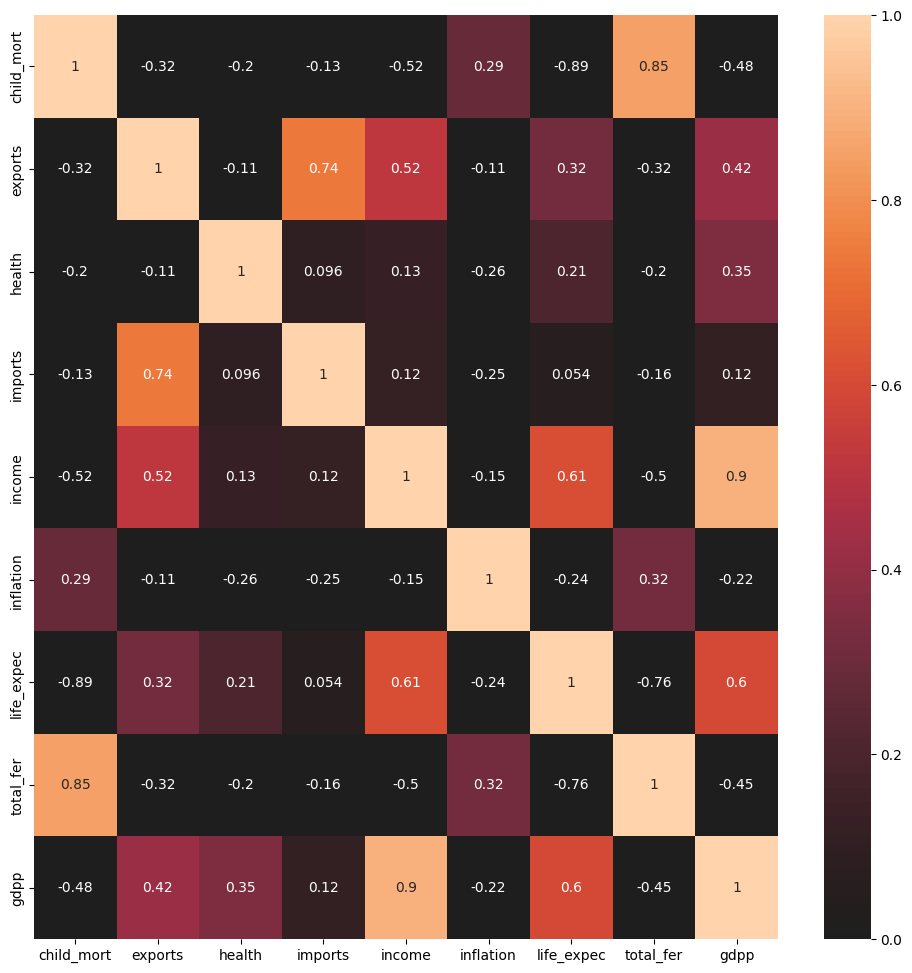

In [294]:
# put your answer here
correlation_matrix = df_numerical.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(correlation_matrix, annot=True, vmin=0, vmax=1, center=0)
plt.show()

Identify 2–3 variables that appear strongly correlated `(10 pts)`
- Explain your observations in the text cell below.

In [295]:
# put your answer here
dt = df_numerical[["life_expec", "gdpp"]]
dt.head()

,life_expec,gdpp
0,56.2,553
1,76.3,4090
2,76.5,4460
3,60.1,3530
4,76.8,12200


<Axes: title={'center': 'Life expec and Exports'}, xlabel='life_expec', ylabel='gdpp'>

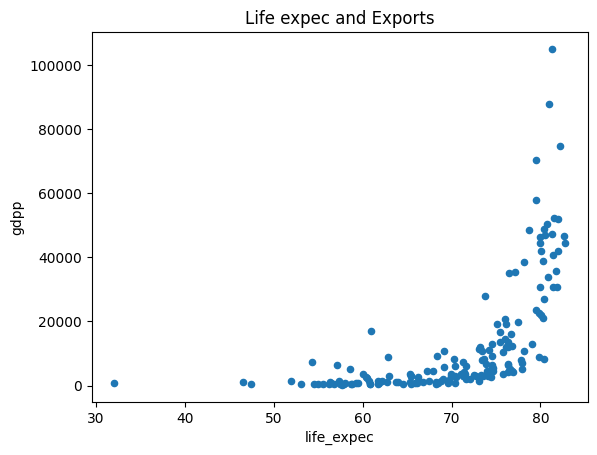

In [296]:
dt.plot(kind="scatter", x="life_expec", y="gdpp", title="Life expec and Exports")

In [297]:
dt3d = df_numerical[["life_expec", "gdpp", "income"]]
dt3d.head()

,life_expec,gdpp,income
0,56.2,553,1610
1,76.3,4090,9930
2,76.5,4460,12900
3,60.1,3530,5900
4,76.8,12200,19100


In [298]:
import plotly.express as px

fig = px.scatter_3d(df, x='life_expec', y='gdpp', z='income')
fig.show()

## 6. Hierarchical Clustering

Compute and display a dendrogram using the linkage method `(10 pts)`
- Use `'ward'` linkage to minimize variance within clusters.

Text(0, 0.5, 'Euclidean distance in the space with other variables')

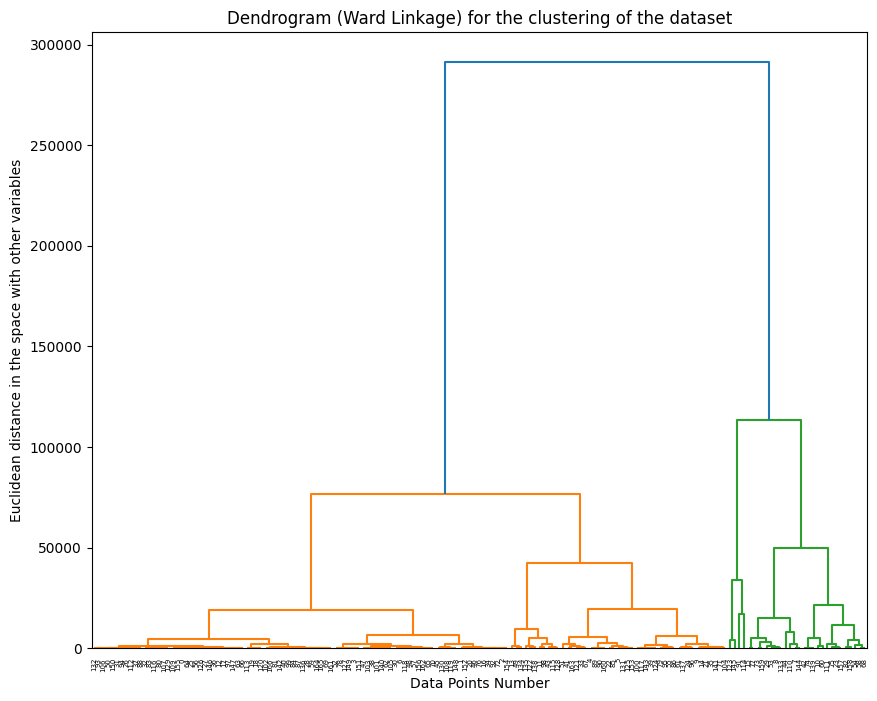

In [299]:
# put your answer here
Z = linkage(dt, method="ward")
plt.figure(figsize=(10,8))
den = dendrogram(Z)
plt.title('Dendrogram (Ward Linkage) for the clustering of the dataset')
plt.xlabel('Data Points Number')
plt.ylabel('Euclidean distance in the space with other variables')

Based on the dendrogram, choose a reasonable number of clusters `(5 pts)`
- Write your chosen number below and explain your reasoning.

## **Answer**:

**Number of clusters**: 3

**Reason**: I used silhouette computation and it shows that cluster 3 has the highest value closer to 1.

Perform Agglomerative Clustering using your chosen cluster count `(10 pts)`
- Attach the cluster labels back to the original dataframe.

In [300]:
from sklearn.metrics import silhouette_score

# Silhouette Score
data = pd.DataFrame({'x': df["life_expec"], 'y': df["gdpp"]})
for k in range(2,10):
  cluster_H = AgglomerativeClustering(n_clusters=k,linkage= 'average')
  model_clt = cluster_H.fit(data)
  label = model_clt.labels_
  sil_coeff = silhouette_score(data,label,metric = 'euclidean')
  print('For cluster= {}, Silhouette Coefficient is {}'.format(k,sil_coeff))
print('\n')
print('For Cluster = 2, it has highest Silhouette Value. So Number of Cluster = 2')


For cluster= 2, Silhouette Coefficient is 0.759572375984092
For cluster= 3, Silhouette Coefficient is 0.7848025915164216
For cluster= 4, Silhouette Coefficient is 0.7756107813664272
For cluster= 5, Silhouette Coefficient is 0.7688877098240943
For cluster= 6, Silhouette Coefficient is 0.7226954483766721
For cluster= 7, Silhouette Coefficient is 0.6654629986398688
For cluster= 8, Silhouette Coefficient is 0.655233026690415
For cluster= 9, Silhouette Coefficient is 0.6449069289706785


For Cluster = 2, it has highest Silhouette Value. So Number of Cluster = 2


In [301]:
cluster_H = AgglomerativeClustering(n_clusters=3,linkage= 'ward')

model_clt = cluster_H.fit(dt)
print(model_clt)
print('\n')

dt['clusters'] = model_clt.labels_
print('Clusters assigned to each datapoints, cluster = 2 :')
print(dt['clusters'])

AgglomerativeClustering(n_clusters=3)


Clusters assigned to each datapoints, cluster = 2 :
0      0
1      0
2      0
3      0
4      0
      ..
162    0
163    0
164    0
165    0
166    0
Name: clusters, Length: 167, dtype: int64


/tmp/ipython-input-1340115926.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## 7. Visualizing Cluster Results

Create a scatter plot using any 2 meaningful features, colored by cluster `(10 pts)`
- Choose variables that make socioeconomic sense (e.g., GDP per capita vs. life expectancy).

<Axes: xlabel='life_expec', ylabel='gdpp'>

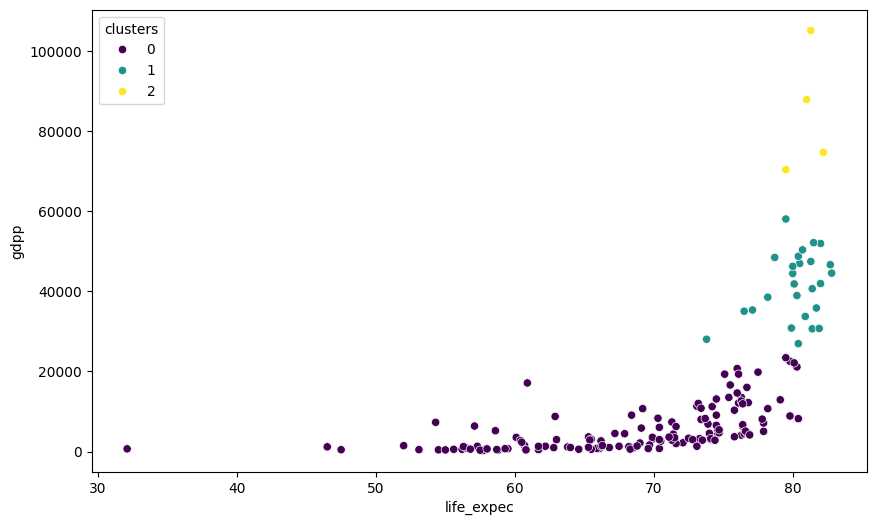

In [302]:
# put your answer here
plt.figure(figsize=(10, 6))
sns.scatterplot(data=dt, x='life_expec', y='gdpp', hue='clusters', palette='viridis')

Describe the characteristics of each cluster `(5 pts)`
- What patterns can you infer about country groupings?

## Answer:
- I observed that life expectancy and gdpp has positive correlation.
- All countries with medium to high gdpp has the highest life expectancy

## Clusters:
- Violet cluster are the low development countries
- Cyan cluster are the medium development countries
- Yellow cluster are the high development countries


## 8. Reflection
Write a short reflection on what socioeconomic insights hierarchical clustering revealed about global development patterns. `(10 pts)`


First, I chose these features because based on the instruction, we aim to understand how countries differ in terms of economy, health, and social, and social wellbeing. These fields are related to these

The features that I chose revealed that countries with low life expectancy has low if not 0 capabilities of increasing their gdpp.

